PART II (LINEAR REGRESSION)

In [110]:
#Importing the libraries
import pandas as pd
import numpy as np
import random

In [111]:
# Loading the data
data = pd.read_csv(r"flight_price_prediction.csv")

In [112]:
#Printing data statistics
data.head() 

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [113]:
#Printing data statistics
data.describe() 

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [114]:
# Dropping missing values
data.dropna(inplace=True)

In [115]:
# Making a copy of the original dataframe
df_copy = data.copy()

In [116]:
# Dropping the 'Unnamed: 0' column
df = data.drop(['Unnamed: 0'], axis=1)

In [117]:
# Converting categorical variables to category data type
df['destination_city'] = df['destination_city'].astype('category')
df['source_city'] = df['source_city'].astype('category')
df['stops'] = df['stops'].astype('category')
df['airline'] = df['airline'].astype('category')
df['class'] = df['class'].astype('category')

In [118]:
# Mapping categorical variables to numerical values
category_mapping = {'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5}
df['departure_time'] = df['departure_time'].map(category_mapping)
df['arrival_time'] = df['arrival_time'].map(category_mapping)

In [119]:
# One Hot Encode the Categorical Variables
df = pd.get_dummies(df)

In [120]:
#Initializing the split ratio
import random
sp = 0.8

In [121]:
#Initializing the split index
data = df.sample(frac=1, random_state=random.randint(0, 100))
ind = int(len(data) * sp)

In [122]:
# Train Test Split
dtrain = df.iloc[:ind]
dtest = df.iloc[ind:]

In [123]:
mdt = dtrain['departure_time'].min()
mxdt = dtrain['departure_time'].max()
dtrain['departure_time'] = (dtrain['departure_time'] - mdt) / (mxdt - mdt)

<ipython-input-123-4627d1e588a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain['departure_time'] = (dtrain['departure_time'] - mdt) / (mxdt - mdt)


In [124]:
# Saving normalization parameters (Min Max Values)
parameters1 = {'min_val': mdt, 'max_val': mxdt}
dtest['departure_time'] = (dtest['departure_time'] - parameters1['min_val']) / (parameters1['max_val'] - parameters1['min_val'])

<ipython-input-124-fdfd96242de8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest['departure_time'] = (dtest['departure_time'] - parameters1['min_val']) / (parameters1['max_val'] - parameters1['min_val'])


In [125]:
mat = dtrain['arrival_time'].min()
mxat = dtrain['arrival_time'].max()
dtrain['arrival_time'] = (dtrain['arrival_time'] - mat) / (mxat - mat)

<ipython-input-125-ee116f664e47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain['arrival_time'] = (dtrain['arrival_time'] - mat) / (mxat - mat)


In [126]:
# Saving normalization parameters (Min Max Values)
arrival_time_norm_params = {'min_val': mat, 'max_val': mxat}
dtest['departure_time'] = (dtest['departure_time'] - arrival_time_norm_params['min_val']) / (arrival_time_norm_params['max_val'] - arrival_time_norm_params['min_val'])


<ipython-input-126-e59bb52d15e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest['departure_time'] = (dtest['departure_time'] - arrival_time_norm_params['min_val']) / (arrival_time_norm_params['max_val'] - arrival_time_norm_params['min_val'])


In [127]:
md = dtrain['duration'].min()
mxd = dtrain['duration'].max()
dtrain['duration']=(dtrain['duration']-md)/(mxd-md)

<ipython-input-127-672aa7753470>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain['duration']=(dtrain['duration']-md)/(mxd-md)


In [128]:
# Saving normalization parameters (Min Max Values)
duration_norm_params = {'min_val': md, 'max_val': mxd}
dtest['duration'] = (dtest['duration'] - duration_norm_params['min_val']) / (duration_norm_params['max_val'] - duration_norm_params['min_val'])

<ipython-input-128-c0aa0b17332a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest['duration'] = (dtest['duration'] - duration_norm_params['min_val']) / (duration_norm_params['max_val'] - duration_norm_params['min_val'])


In [129]:
days_left_min = dtrain['days_left'].min()
days_left_max = dtrain['days_left'].max()
dtrain['days_left'] = (dtrain['days_left'] - days_left_min) / (days_left_max - days_left_min)


<ipython-input-129-beee6e40f547>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrain['days_left'] = (dtrain['days_left'] - days_left_min) / (days_left_max - days_left_min)


In [130]:
# Saving normalization parameters (Min Max Values)
parameters2 = {'min_val': days_left_min, 'max_val': days_left_max}
dtest['days_left'] = (dtest['days_left'] - parameters2['min_val']) / (parameters2['max_val'] - parameters2['min_val'])

<ipython-input-130-307d5c20c3d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest['days_left'] = (dtest['days_left'] - parameters2['min_val']) / (parameters2['max_val'] - parameters2['min_val'])


In [131]:
X_train = dtrain.drop(['price'], axis = 1)
X_train = X_train.to_numpy()
y_train = dtrain['price']

X_test = dtest.drop(['price'], axis = 1)
X_test = X_test.to_numpy()
y_test = dtest['price']

In [132]:
print('X_train_shape:',X_train.shape)
print('y_train_shape:',y_train.shape)
print('X_test_shape:',X_test.shape)
print('y_test_shape:',y_test.shape)

X_train_shape: (240122, 1588)
y_train_shape: (240122,)
X_test_shape: (60031, 1588)
y_test_shape: (60031,)


In [133]:
df.shape

(300153, 1589)

In [134]:
# Definining the Linear Regression class
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        XTX = X.T.dot(X)
        XTy = X.T.dot(y)
        self.w = np.linalg.solve(XTX, XTy)

    def predict(self, X):
        return X.dot(self.w)


In [135]:
# Training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [136]:
# Making predictions on the testing set
y_pred = regressor.predict(X_test)

In [137]:
y_pred

array([54757.11258231, 50945.07099877, 55798.21919398, ...,
       48228.97385181, 47321.18226547, 47803.40967483])

In [138]:
# Computing the mean squared error
mse = ((y_test - y_pred) ** 2).mean()

print("MSE: ", mse)

MSE:  120525763.2514224


In [148]:
import pickle
with open('simhavis_assignment1_part2.pickle', 'wb') as f:
    pickle.dump(regressor.w, f)

In [140]:
data.describe()

,departure_time,arrival_time,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,1.867814,2.699087,12.221021,26.004751,20889.660523,0.053633,0.269503,0.077204,0.143660,0.030021,...,0.044264,0.119952,0.170140,0.134491,0.191103,0.142347,0.165029,0.196890,0.311464,0.688536
std,1.416183,1.351441,7.191997,13.561004,22697.767366,0.225292,0.443702,0.266915,0.350745,0.170646,...,0.205682,0.324906,0.375756,0.341180,0.393170,0.349407,0.371207,0.397649,0.463093,0.463093
min,0.000000,0.000000,0.830000,1.000000,1105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,6.830000,15.000000,4783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,11.250000,26.000000,7425.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,4.000000,16.170000,38.000000,42521.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,5.000000,49.830000,49.000000,123071.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



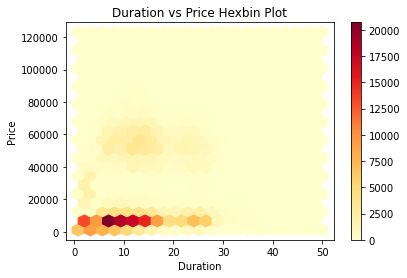

In [142]:
plt.hexbin(df_copy['duration'], df_copy['price'], gridsize=20, cmap='YlOrRd')
plt.colorbar()
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Duration vs Price Hexbin Plot')
plt.show()


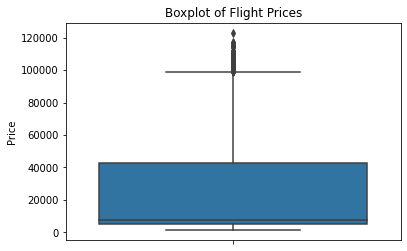

In [143]:
import seaborn as sns

sns.boxplot(y='price', data=df_copy)
plt.title('Boxplot of Flight Prices')
plt.ylabel('Price')
plt.show()


**PART III (RIDGE REGRESSION)**

In [144]:
import numpy as np

class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
    
    def fit(self, X, y):
        # Add a column of ones to X to represent the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Calculate the weights using the Ridge Regression formula
        L = np.eye(X.shape[1]) * self.alpha
        L[0, 0] = 0  # Don't regularize the intercept term
        
        XtX = np.dot(X.T, X)
        XtY = np.dot(X.T, y)
        self.weights = np.dot(np.linalg.inv(XtX + L), XtY)
    
    def predict(self, X):
        # Add a column of ones to X to represent the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Predict the target values
        y_pred = np.dot(X, self.weights)
        
        return y_pred

# Usage example
model = RidgeRegression(alpha=1.0)
model.fit(X_train, y_train)




In [145]:
# Make predictions on new input data
y_pred = model.predict(X_test)
mse = ((y_test - y_pred) ** 2).mean()
print(f"MSE: {mse}")

MSE: 121369333.27607162


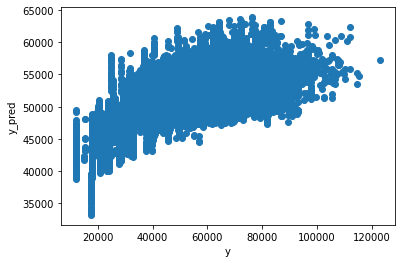

In [146]:
plt.scatter(y_test, y_pred)
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [149]:
import pickle
weights = model.weights
with open('simhavis_assignment1_part3.pickle', 'wb') as f:
    pickle.dump(weights, f)